## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
from scipy.stats import linregress


# Study data files
mouse_metadata_path = os.path.join('data','Mouse_metadata.csv')
study_results_path = os.path.join('data','Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data_df=pd.merge(mouse_metadata,study_results,on='Mouse ID',how='outer'  )

In [2]:
# Checking the number of mice in the DataFrame.
number_mouse=all_data_df['Mouse ID'].nunique()
number_test=all_data_df['Mouse ID'].count()
print(f'The number of unique mice in the mouse metadata is: {number_mouse}')
print(f'The number of tests in the metadata is: {number_test}')

The number of unique mice in the mouse metadata is: 249
The number of tests in the metadata is: 1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
all_data_df['is_duplicated']=all_data_df[['Mouse ID','Timepoint']].duplicated()
dup=all_data_df.loc[all_data_df['is_duplicated']==True,:]

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
dup.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicated
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df=all_data_df.drop(index=dup.index)
del clean_data_df['is_duplicated']
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
number_test_clean=clean_data_df['Mouse ID'].count()
print(f'The number of tests in the clean data is: {number_test_clean}')


The number of tests in the clean data is: 1888


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

by_regimen=clean_data_df.groupby('Drug Regimen')
by_regimen_mean=by_regimen.mean()['Tumor Volume (mm3)']
by_regimen_median=by_regimen.median()['Tumor Volume (mm3)']
by_regimen_var=by_regimen['Tumor Volume (mm3)'].var()
by_regimen_std=by_regimen['Tumor Volume (mm3)'].std()
by_regimen_sem=by_regimen['Tumor Volume (mm3)'].sem()
summary_stats_df=pd.DataFrame({"Mean":by_regimen_mean,
                                "Median":by_regimen_median,
                               "Variance":by_regimen_var,
                               "Std. Deviation":by_regimen_std,
                               "SEM":by_regimen_sem 
                            })
summary_stats_df=summary_stats_df.round(2)
summary_stats_df.head(clean_data_df["Drug Regimen"].nunique())

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

by_regimen2=clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std,'sem'])
by_regimen2.round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

<IPython.core.display.Javascript object>


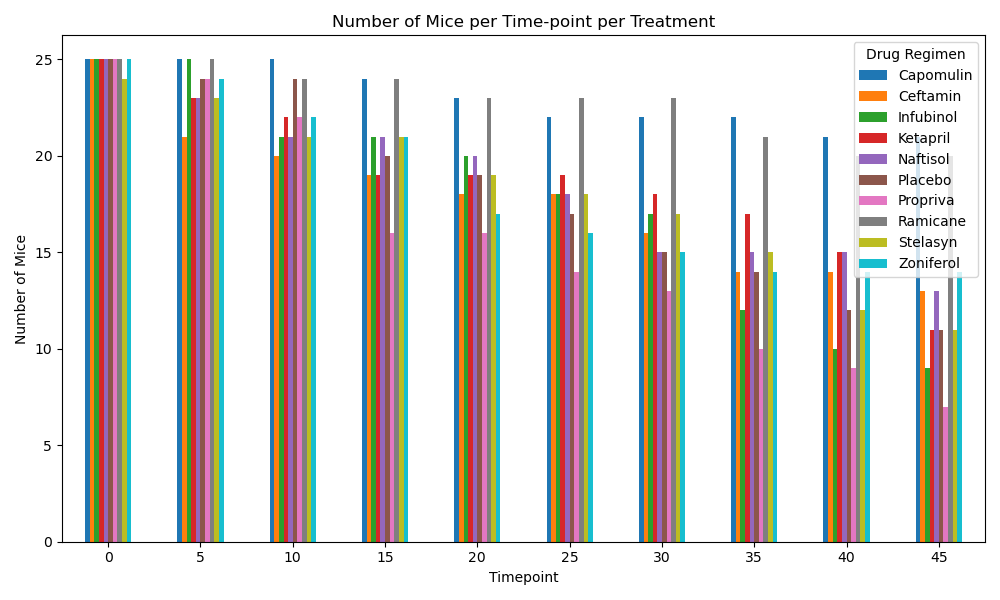

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pandas.

pd.crosstab(clean_data_df['Timepoint'], clean_data_df['Drug Regimen'], 
            values=clean_data_df['Mouse ID'], aggfunc='count').plot(kind="bar",rot=0,figsize=(10,6))
plt.title('Number of Mice per Time-point per Treatment')
plt.ylabel('Number of Mice')
plt.tight_layout()
plt.show()
plt.savefig('../Images/Fig1.png')

<IPython.core.display.Javascript object>


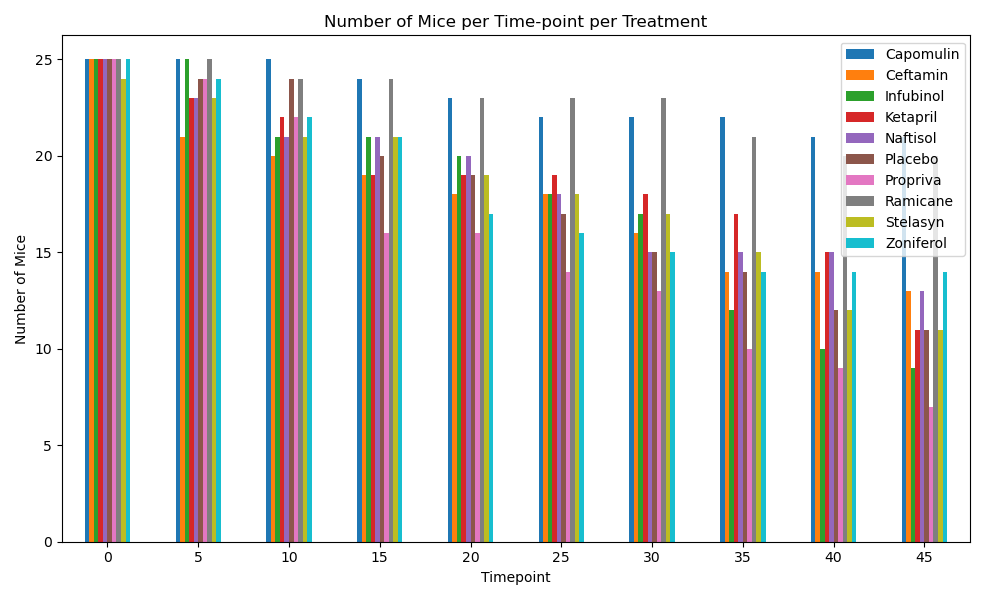

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# #throughout the course of the study using pyplot.
fig, ax = plt.subplots(figsize=(10,6))
clean_data_df.groupby(['Timepoint','Drug Regimen']).count()['Mouse ID'].unstack().plot(kind='bar',ax=ax,rot=0, 
                        title='Number of Mice per Time-point per Treatment')
ax.set_ylabel('Number of Mice')
ax.legend(bbox_to_anchor=(.85, .55))
plt.tight_layout()
plt.show()


## Pie Plots

<IPython.core.display.Javascript object>


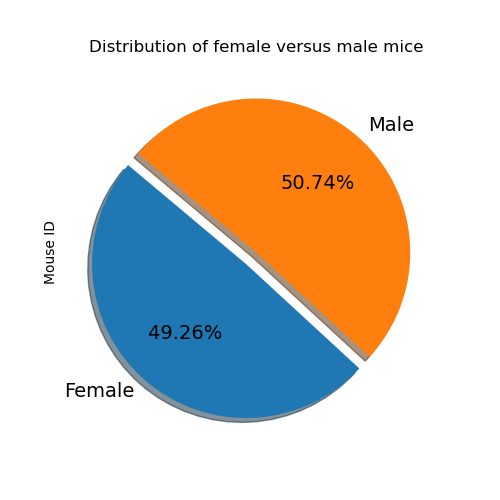

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
fig2, ax2 = plt.subplots(figsize=(10,6))
by_gender=clean_data_df.groupby('Sex').count()['Mouse ID']
ax2.set_ylabel(' ')
explode=(0.1,0)
by_gender.plot.pie(figsize=(5, 5),autopct='%1.2f%%', title="Distribution of female versus male mice",  
                   startangle=140, shadow=True, fontsize=14,explode=explode,ax=ax2)

plt.show()
plt.savefig('../Images/Fig2.png')

<IPython.core.display.Javascript object>


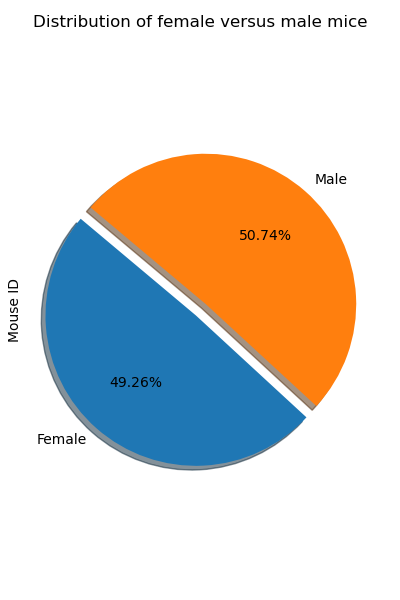

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig3, ax3 = plt.subplots(figsize=(4,6))
labels=by_gender.keys()
explode=(0.1,0)
plt.pie(by_gender,labels=labels, explode=explode,autopct='%.2f%%', startangle=140, shadow=True)
plt.axis('equal')
plt.title('Distribution of female versus male mice')
plt.tight_layout()
plt.ylabel('Mouse ID')
plt.show()

## Quartiles, Outliers and Boxplots

<IPython.core.display.Javascript object>


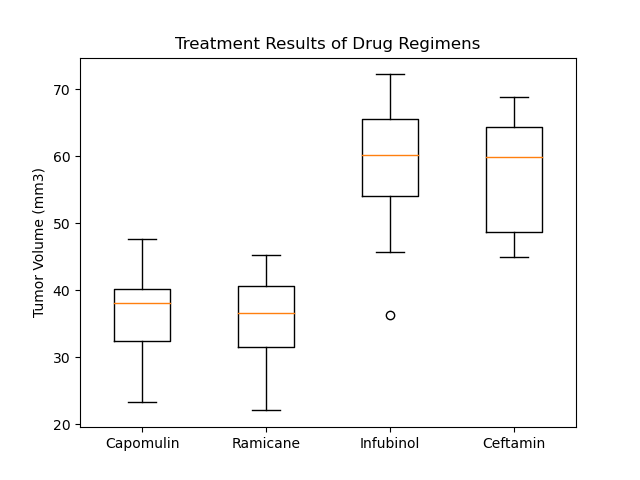

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
best_regimes=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Generate dataframe with filtered data
by_top_treatment_df=clean_data_df.loc[clean_data_df['Drug Regimen'].isin(best_regimes)]
by_max_timepoint=by_top_treatment_df.groupby([by_top_treatment_df['Mouse ID']], as_index=False)['Timepoint'].max()
by_max_timepoint=pd.DataFrame(by_max_timepoint)
by_tumor_reduction=pd.merge(by_max_timepoint,clean_data_df,on=("Mouse ID","Timepoint"), how='left')

data=[]
i=0
for x in best_regimes:
    data_points_i=by_tumor_reduction.loc[by_tumor_reduction['Drug Regimen']==x,"Tumor Volume (mm3)"]
    data_points_i=list(data_points_i)
    data.append(data_points_i)
    i=i+1

fig7,ax7=plt.subplots()
ax7.boxplot(data)
ax7.set_ylabel("Tumor Volume (mm3)")
ax7.set_title(f'Treatment Results of Drug Regimens')
location=[1,2,3,4]
plt.xticks(location,best_regimes)
plt.show()
plt.savefig('../Images/Fig3.png')


## Line and Scatter Plots

<IPython.core.display.Javascript object>


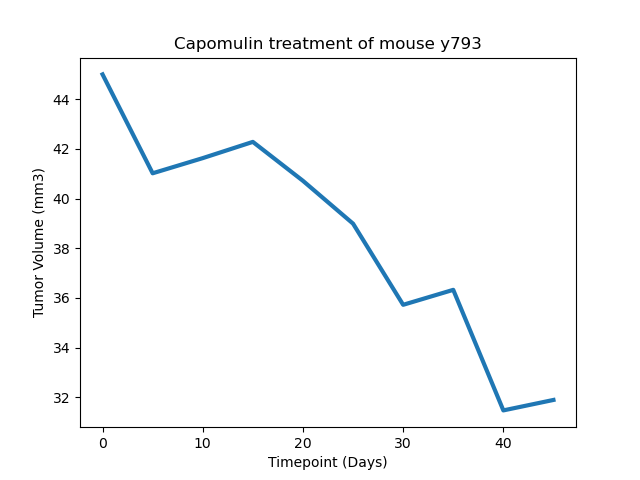

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
by_Capomulin_df=clean_data_df.loc[clean_data_df['Drug Regimen']=='Capomulin',:]
mouse_select=by_Capomulin_df['Mouse ID'].sample()
mouse_select=mouse_select.iloc[0]
by_Capomulin_mouse_df=by_Capomulin_df.loc[(by_Capomulin_df['Mouse ID']==mouse_select),:]

fig8,ax8=plt.subplots()
ax8.plot(by_Capomulin_mouse_df['Timepoint'], by_Capomulin_mouse_df['Tumor Volume (mm3)'], linewidth=3, markersize=15)
ax8.set_ylabel("Tumor Volume (mm3)")
ax8.set_xlabel("Timepoint (Days)")
ax8.set_title(f'Capomulin treatment of mouse {mouse_select}')
plt.show()
plt.savefig('../Images/Fig4.png')

<IPython.core.display.Javascript object>


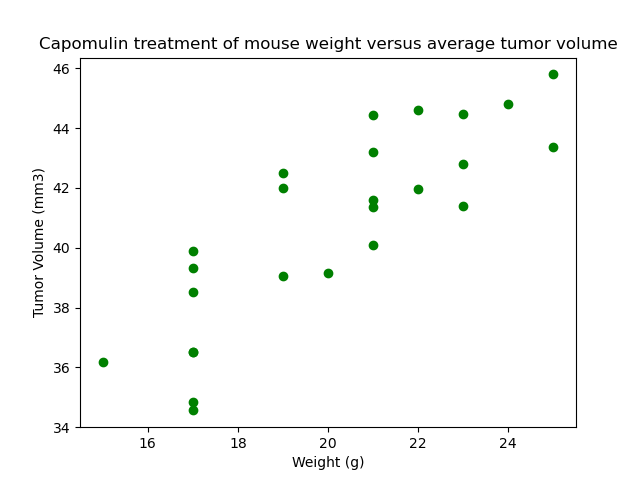

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
by_avg_Capomulin=by_Capomulin_df.groupby('Mouse ID').mean()
x_axis=by_avg_Capomulin['Weight (g)']
y_axis=by_avg_Capomulin['Tumor Volume (mm3)']
fig9,ax9=plt.subplots()
ax9.scatter(x_axis,y_axis,color="green")
ax9.set_ylabel("Tumor Volume (mm3)")
ax9.set_xlabel("Weight (g)")
ax9.set_title(f'Capomulin treatment of mouse weight versus average tumor volume')
plt.show()

## Correlation and Regression

<IPython.core.display.Javascript object>


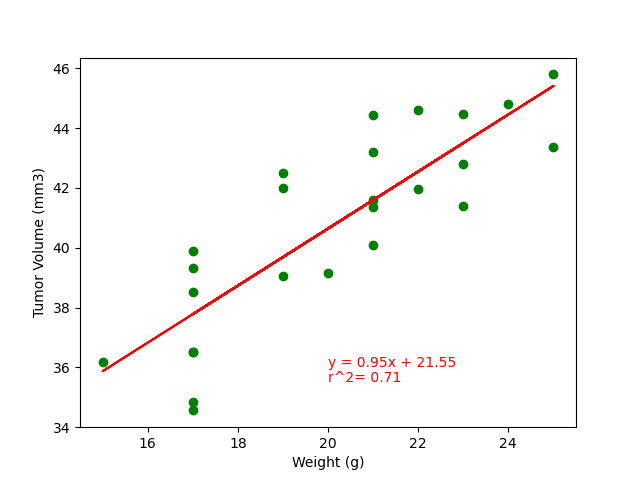

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig10,ax10=plt.subplots()
ax10.scatter(x_axis,y_axis,color="green")
ax10.plot(x_axis,regress_values,"r-")
ax10.annotate(line_eq,(20,36),fontsize=10,color="red")
ax10.annotate(f'r^2= {round(rvalue**2,2)}',(20,35.5),fontsize=10,color="red")
ax10.set_xlabel("Weight (g)")
ax10.set_ylabel("Tumor Volume (mm3)")
plt.show()
plt.savefig('../Images/Fig5.png')